# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Whales profit as high Ethereum gas fees sideline retail DeFi investors.  High gas fees on the Ethereum network are making it nearly impossible for retail investors to interact with DeFi protocols but the same doesn’t apply to whales. ... [| Skaityti daugiau](https://cointelegraph.com/news/whales-profit-as-high-ethereum-gas-fees-sideline-retail-defi-investors) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- New COVID-19 outbreak declared at Cargill meat plant in Alberta — site of Canada's largest outbreak | CBC News.  The site of the largest COVID-19 outbreak in Canada is now facing a new spate of cases. Alberta Health Services confirmed there are 11 cases linked to the Cargill meat-processing plant near High River, Alta., as of Saturday. Of those, seven cases are active. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/calgary/cargill-high-river-outbreak-1.5904444) 

### Kainų kaita pandemijos metu

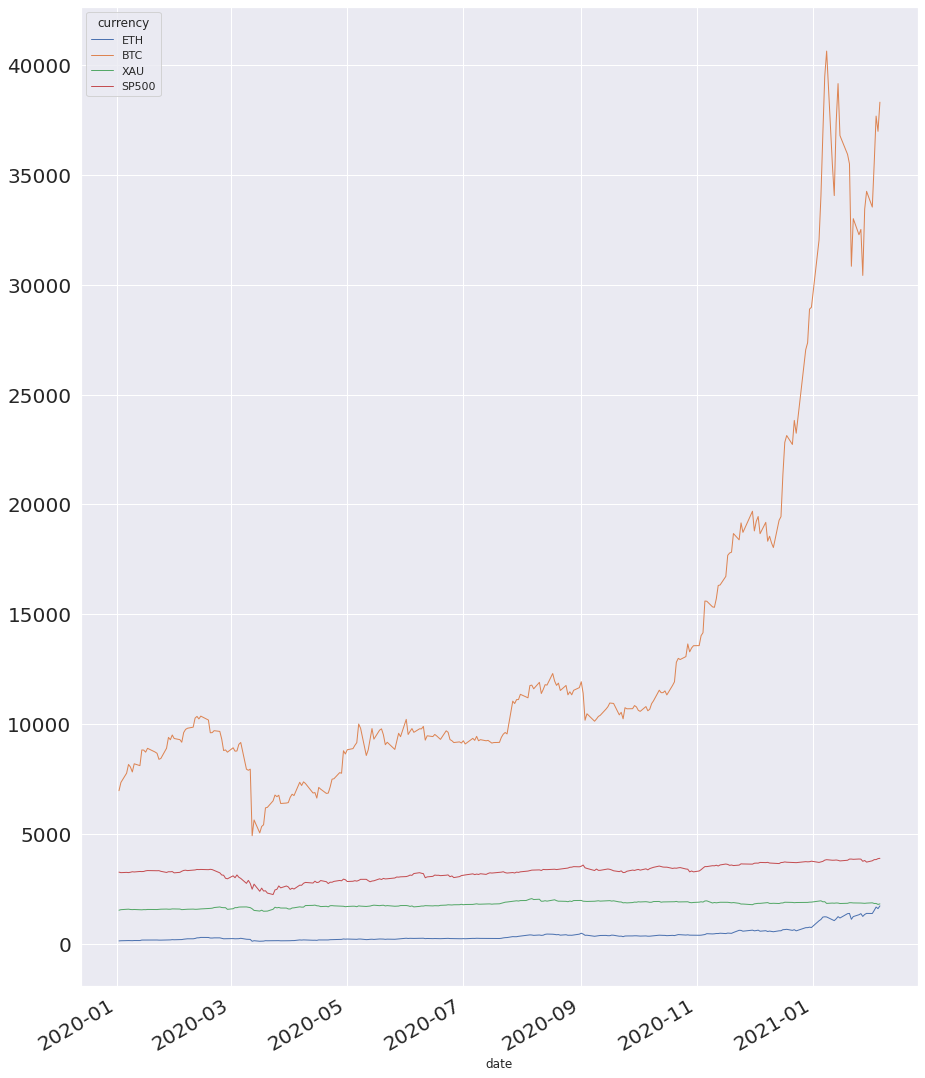

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.968893,0.446071,0.735638
BTC,0.968893,1.000000,0.401328,0.751084
XAU,0.446071,0.401328,1.000000,0.575621
SP500,0.735638,0.751084,0.575621,1.000000


In [8]:
#hide ### Koreliacijos matrica.

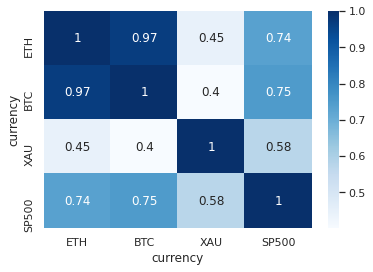

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')